# Investigating basis states populations over time

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from demonstration_utils import *
import interaction_constants
from qubit_system.geometry.regular_lattice_1d import RegularLattice1D
from qubit_system.qubit_system_classes import EvolvingQubitSystem
from qubit_system.utils.ghz_states import StandardGHZState
from qubit_system.utils.interpolation import get_hamiltonian_coeff_linear_interpolation
from qubit_system.utils.states import get_states, get_label_from_state, get_product_basis_states_index

In [2]:
N_RYD = 50
C6 = interaction_constants.get_C6(N_RYD)

LATTICE_SPACING = 1.5e-6

print(f"C6: {C6:.3e}")
characteristic_V = C6 / (LATTICE_SPACING ** 6)
print(f"Characteristic V: {characteristic_V:.3e} Hz")

norm_V = C6 / (LATTICE_SPACING ** 6) / characteristic_V

C6: 1.555e-26
Characteristic V: 1.365e+09 Hz


In [12]:
def plot_basis_state_populations(e_qs: EvolvingQubitSystem):
    if e_qs.solve_result is None:
        e_qs.solve()
    quartile_index = int(len(e_qs.t_list) / 4)
    indices = [0, quartile_index, quartile_index * 2, quartile_index * 3, -1]
    
    states = get_states(e_qs.N)
    
    for i in indices:
        plt.figure(figsize=(15, 4))
        plt.ylim(0, 1)
        plt.grid(axis='y')
        basis_state_populations = []
        labels = []
        
        _solve_result_state = e_qs.solve_result.states[i]
        solve_result_state_populations = np.abs(_solve_result_state.data.toarray().flatten()) ** 2
        for state in states:
            label = get_label_from_state(state)
            state_product_basis_index = get_product_basis_states_index(state)
            basis_state_population = solve_result_state_populations[state_product_basis_index]
            basis_state_populations.append(basis_state_population)
            labels.append(label)
        
        x = np.arange(len(labels))
        plt.bar(x=x, height=basis_state_populations)
        plt.xticks(x, labels)
        plt.show()
        


Solved in 0.11s
fidelity with GHZ: 0.7489 (with antisymmetric: 0.1152)
superposition probability: 0.8641 (g: 0.4653, e: 0.3988)



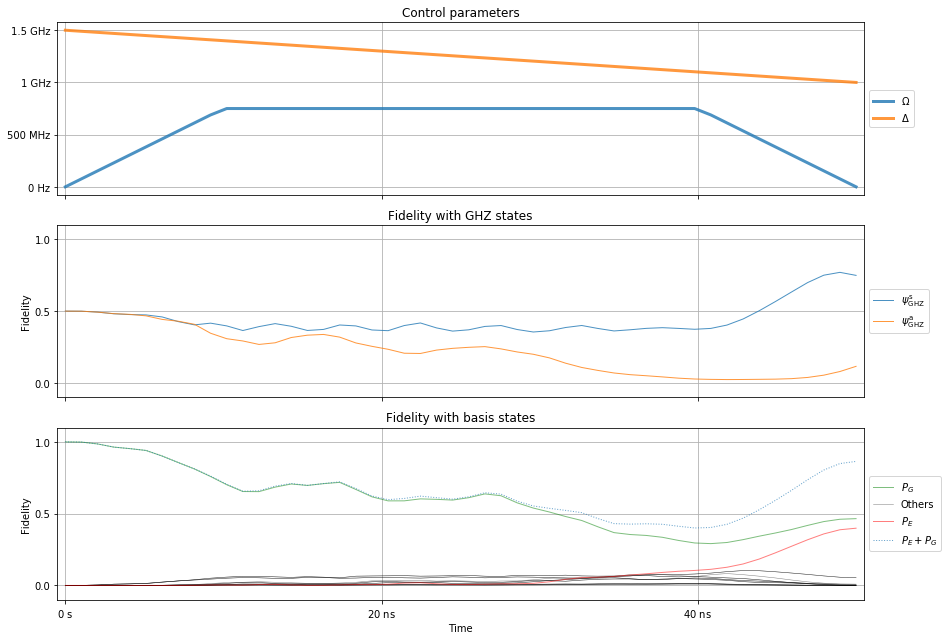

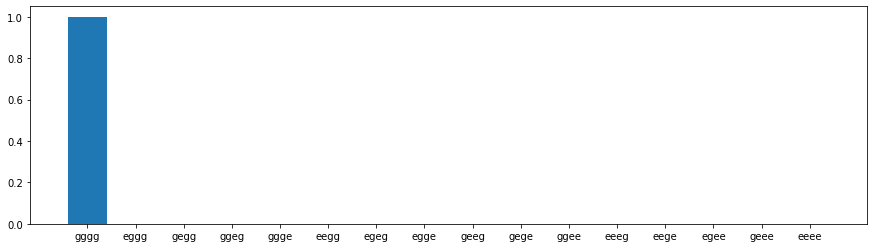

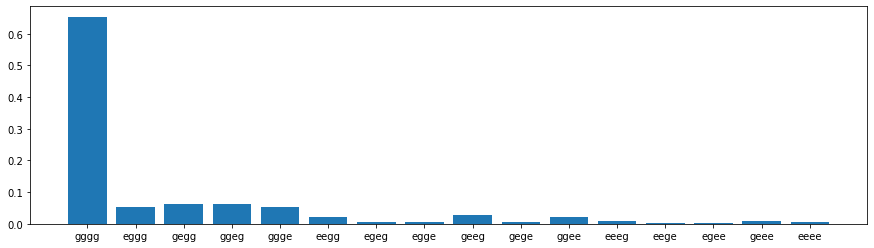

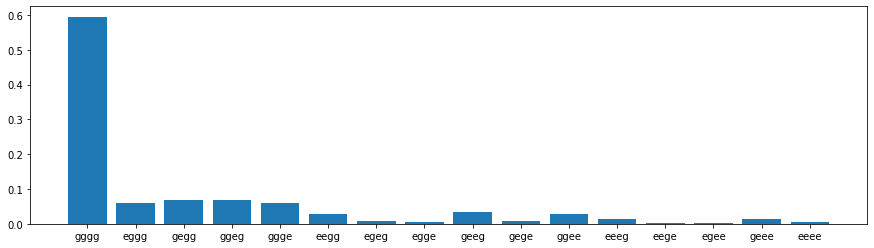

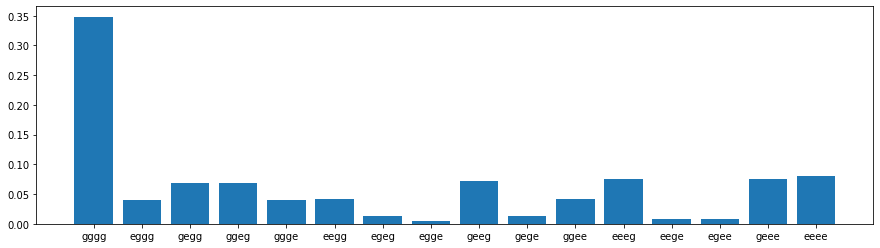

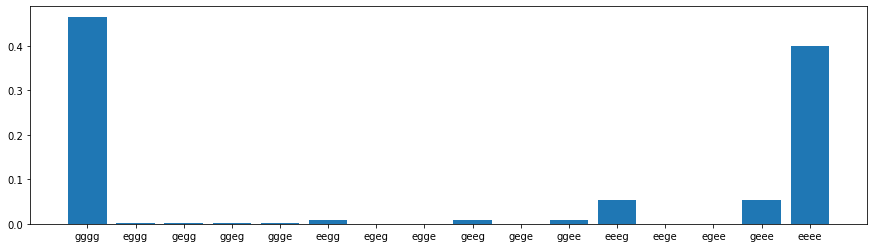

In [10]:
N = 4
t = 0.05e-6
e_qs = EvolvingQubitSystem(
    N=N, V=C6, geometry=RegularLattice1D(spacing=LATTICE_SPACING),
    Omega=get_hamiltonian_coeff_linear_interpolation([0, t / 5, t * 4 / 5, t], [0, 750e6, 750e6, 0]),
    Delta=get_hamiltonian_coeff_linear_interpolation([0, t], [1.5e9, 1e9]),
    t_list=np.linspace(0, t, 50),
    ghz_state=StandardGHZState(N)
)
solve_and_print_stats(e_qs)
plot_basis_state_populations(e_qs)

Solved in 1.29s
fidelity with GHZ: 0.0008 (with antisymmetric: 0.9903)
superposition probability: 0.9911 (g: 0.4758, e: 0.5154)



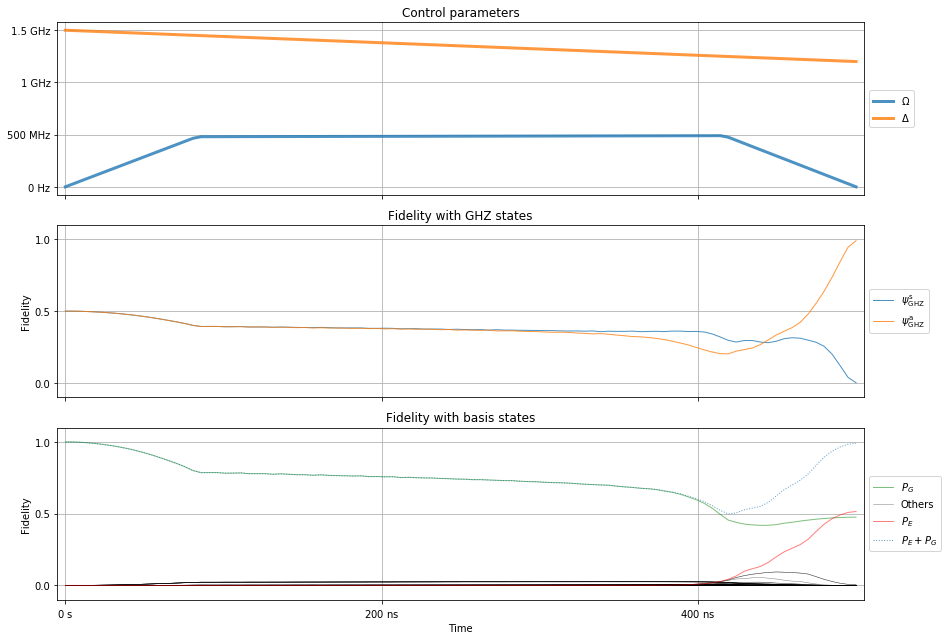

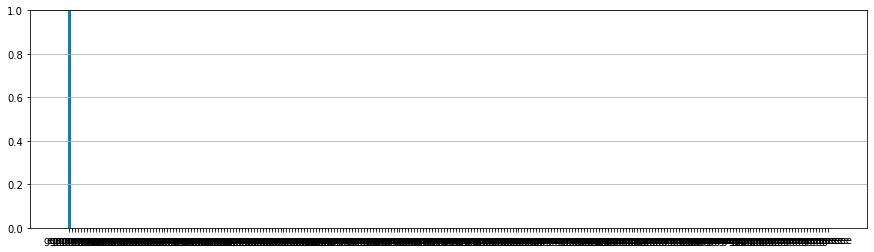

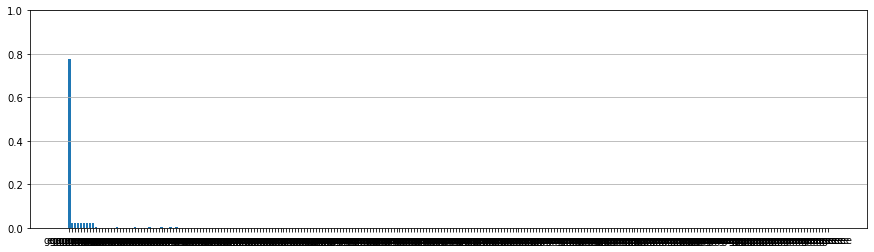

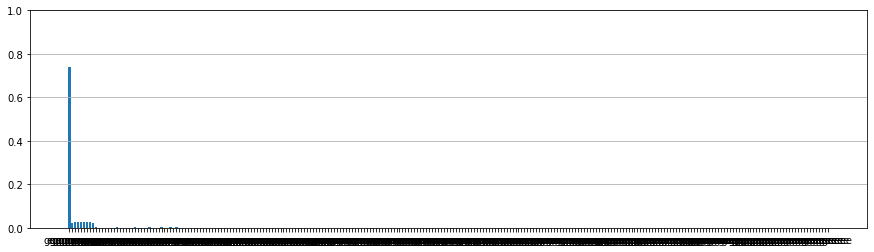

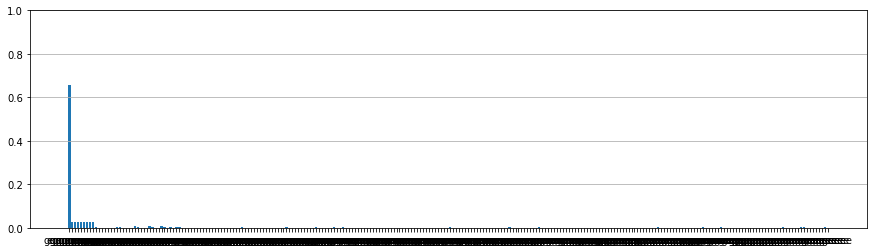

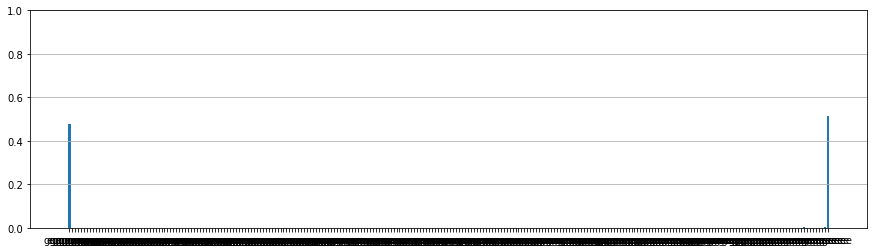

In [13]:
N = 8
t = 0.5e-6
e_qs = EvolvingQubitSystem(
    N=N, V=C6, geometry=RegularLattice1D(spacing=LATTICE_SPACING),
    Omega=get_hamiltonian_coeff_linear_interpolation([0, t / 6, t * 5 / 6, t], [0, 480e6, 490e6, 0]),
    Delta=get_hamiltonian_coeff_linear_interpolation([0, t], [1.5e9, 1.2e9]),
    t_list=np.linspace(0, t, 100),
    ghz_state=StandardGHZState(N)
)
solve_and_print_stats(e_qs)
plot_basis_state_populations(e_qs)